In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
tesla_acc = "data/Tesla Deaths - Deaths_2.csv"

# Read the Telsa_accidents data
tesla_data = pd.read_csv(tesla_acc)

In [50]:
tesla_data

,Case #,Year,Date,Country,State,Description,Deaths,Tesla driver,Tesla occupant,Other vehicle,...,Verified Tesla Autopilot Deaths,Verified Tesla Autopilot Deaths + All Deaths Reported to NHTSA SGO,Unnamed: 16,Unnamed: 17,Source,Note,Deceased 1,Deceased 2,Deceased 3,Deceased 4
0,296,2022,1/30/2023,USA,MO,Speeding Tesla crashes into car,1,-,-,1,...,-,-,https://web.archive.org/web/20230130231416/ht...,https://web.archive.org/web/20230130231416/ht...,https://web.archive.org/web/20230130231416/ht...,NaN,NaN,NaN,NaN,NaN
1,295,2022,1/21/2023,USA,CA,Tesla crashses into resident's pool,1,1,-,-,...,-,-,https://archive.is/r4ida,https://archive.is/r4ida,https://archive.is/r4ida,NaN,NaN,NaN,NaN,NaN
2,294,2022,1/17/2023,USA,CA,Tesla crashes into back of semi,1,1,-,-,...,-,-,NaN,NaN,https://web.archive.org/web/20230118162813/ht...,NaN,NaN,NaN,NaN,NaN
3,293,2022,01/07/23,Canada,-,Tesla crashes,1,1,-,-,...,-,-,NaN,NaN,https://web.archive.org/web/20230109041434/ht...,NaN,Taren Singh Lal,NaN,NaN,NaN
4,292,2022,01/07/23,USA,WA,"Tesla hits pole, catches on fire",1,-,1,-,...,-,-,NaN,NaN,https://web.archive.org/web/20230107232745/ht...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,5,2014,7/14/2014,USA,CA,Tesla kills motorcyclist,1,-,-,1,...,-,-,https://web.archive.org/web/20220817120807/ht...,https://web.archive.org/web/20220817120807/ht...,https://web.archive.org/web/20220817120807/ht...,NaN,NaN,NaN,NaN,NaN
292,4,2014,07/04/14,USA,CA,Thief crashes stolen Tesla,1,1,-,-,...,-,-,https://web.archive.org/web/20220817120839/ht...,https://web.archive.org/web/20220817120839/ht...,https://web.archive.org/web/20220817120839/ht...,NaN,Joshua Slot,NaN,NaN,NaN
293,3,2014,07/04/14,USA,CA,Tesla rear ends stopped car,3,-,-,3,...,-,-,https://web.archive.org/web/20220412004559/ht...,https://web.archive.org/web/20220412004559/ht...,https://web.archive.org/web/20220412004559/ht...,NaN,NaN,NaN,NaN,NaN
294,2,2013,11/02/13,USA,CA,Tesla kills cyclist,1,-,-,-,...,-,-,https://web.archive.org/web/20220817121049/ht...,https://web.archive.org/web/20220817121049/ht...,https://web.archive.org/web/20220817121049/ht...,NaN,NaN,NaN,NaN,NaN


In [52]:
# Deaths caused by Tesla autopilot

autopilot_death = tesla_data[' Autopilot claimed ']

print('Number of deaths caused by Tesla autopilot ' 
      + str(tesla_data[' Autopilot claimed '].sum()))

Number of deaths caused by Tesla autopilot 41.0


In [56]:
#Deaths caused by Tesla autopilot per country
autopilot_country = tesla_data.groupby(' Country ')[' Autopilot claimed '].sum().sort_values(ascending=False)

autopilot_country

 Country 
 USA             33.0
 China            2.0
 Germany          2.0
 Holland          1.0
 Japan            1.0
 South Korea      1.0
 Norway           1.0
 Australia        0.0
 Portugal         0.0
 UK               0.0
 Taiwan           0.0
 Switzerland      0.0
 Spain            0.0
 Slovenia         0.0
 Mexico           0.0
 Netherlands      0.0
 Austria          0.0
 France           0.0
 Finland          0.0
 Denmark          0.0
 Canada           0.0
 Belgium          0.0
 Ukraine          0.0
Name:  Autopilot claimed , dtype: float64

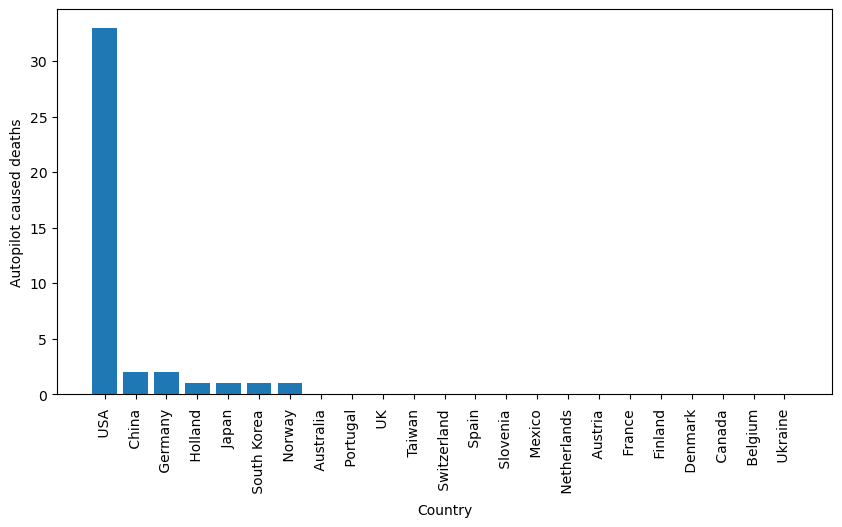

In [65]:
#Deaths caused by Tesla autopilot per country graph

plt.figure(figsize=(10,5))
plt.bar(
    tesla_data.groupby(' Country ')[' Autopilot claimed '].sum().sort_values(ascending=False).index,
    tesla_data.groupby(' Country ')[' Autopilot claimed '].sum().sort_values(ascending=False),

)
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Autopilot caused deaths')
plt.show()

In [66]:
#Deaths caused by Tesla autopilot per year

autopilot_year = tesla_data.groupby('Year')[' Autopilot claimed '].sum()
autopilot_year

Year
2013     0.0
2014     0.0
2015     0.0
2016     2.0
2017     0.0
2018     2.0
2019    10.0
2020     8.0
2021     5.0
2022    14.0
Name:  Autopilot claimed , dtype: float64

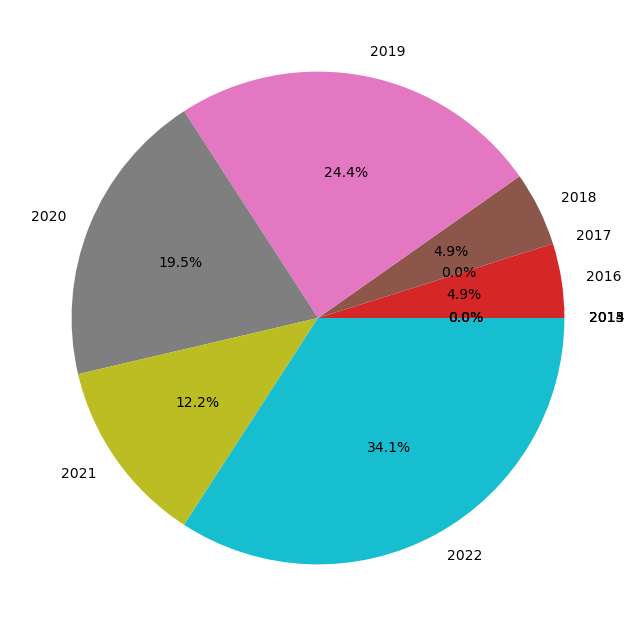

In [64]:
#Deaths caused by Tesla autopilot per year graph

x_values = tesla_data.groupby('Year')[' Autopilot claimed '].sum().index
y_values = tesla_data.groupby('Year')[' Autopilot claimed '].sum()

plt.figure(figsize = (8, 8))
plt.pie(y_values, labels = x_values,autopct='%1.1f%%')
plt.show()

#worth mentioning the decrease in 2020 and 2021 may've been caused by quarantine